# **Computational Drug Discovery Project: Regression Model Comparisons**
By Mathew Kuruvilla

Based on the Drug Discovery Project taught by Chanin Nantasenamat [*'Data Professor' YouTube channel*](http://youtube.com/dataprofessor)

In this project, I will be building a machine learning model using bioactivity data from ChEMBL for coronavirus replicase polyprotein 1ab inhibitors.
This Jupyter notebook will focus on comparing several machine learning algorithms for build regression models of our inhibitor bioactivity data.

---

## **1. Import libraries**

In [35]:
!pip install lazypredict

In [2]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyRegressor

## **2. Load the data set**


In [3]:
df = pd.read_csv('coronavirus_replicase_polyprotein_1ab_data_2class_estate_fp.csv')

In [4]:
X = df.drop('pIC50', axis=1)
Y = df.pIC50

## **3. Data pre-processing**

In [5]:
X.shape

(1802, 79)

In [6]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)
X.shape

(1802, 12)

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

## **4. Compare ML algorithms**

In [8]:
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(X_train, X_train, Y_train, Y_train)
models_test,predictions_test = clf.fit(X_train, X_test, Y_train, Y_test)

  0%|          | 0/42 [00:00<?, ?it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000050 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 36
[LightGBM] [Info] Number of data points in the train set: 1441, number of used features: 12
[LightGBM] [Info] Start training from score 5.766882
'tuple' object has no attribute '__name__'
Invalid Regressor(s)


  0%|          | 0/42 [00:00<?, ?it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000025 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 36
[LightGBM] [Info] Number of data points in the train set: 1441, number of used features: 12
[LightGBM] [Info] Start training from score 5.766882


In [9]:
# Performance table of the training set (80% subset)
predictions_train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
ExtraTreeRegressor,0.47,0.48,1.04,0.01
DecisionTreeRegressor,0.47,0.48,1.04,0.01
ExtraTreesRegressor,0.47,0.48,1.04,0.17
GaussianProcessRegressor,0.47,0.48,1.04,0.17
XGBRegressor,0.47,0.47,1.04,0.18
RandomForestRegressor,0.46,0.46,1.06,0.17
BaggingRegressor,0.45,0.45,1.07,0.03
HistGradientBoostingRegressor,0.37,0.38,1.13,0.17
LGBMRegressor,0.33,0.34,1.17,0.04


In [10]:
# Performance table of the test set (20% subset)
predictions_test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
HistGradientBoostingRegressor,0.25,0.28,1.24,0.16
MLPRegressor,0.24,0.27,1.24,0.51
LGBMRegressor,0.24,0.26,1.25,0.04
SVR,0.23,0.26,1.26,0.09
RandomForestRegressor,0.22,0.25,1.26,0.17
NuSVR,0.22,0.25,1.26,0.08
GradientBoostingRegressor,0.22,0.25,1.26,0.08
KNeighborsRegressor,0.22,0.24,1.27,0.01
BaggingRegressor,0.21,0.24,1.27,0.02


## **5. Data visualization of model performance**

[(0.0, 1.0)]

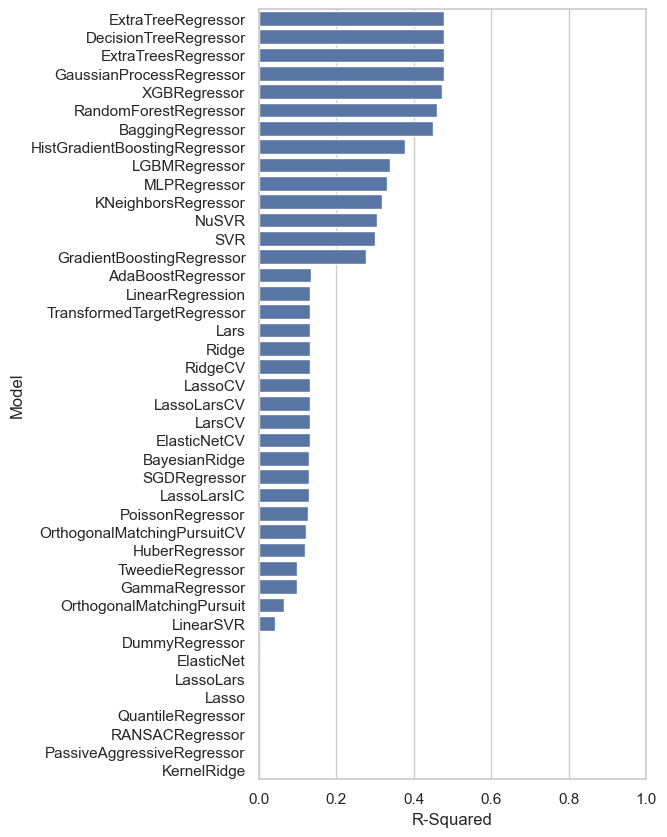

In [11]:
# Bar plot of R-squared values
import matplotlib.pyplot as plt
import seaborn as sns

#train["R-Squared"] = [0 if i < 0 else i for i in train.iloc[:,0] ]

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="R-Squared", data=predictions_train)
ax.set(xlim=(0, 1))

[(0.0, 10.0)]

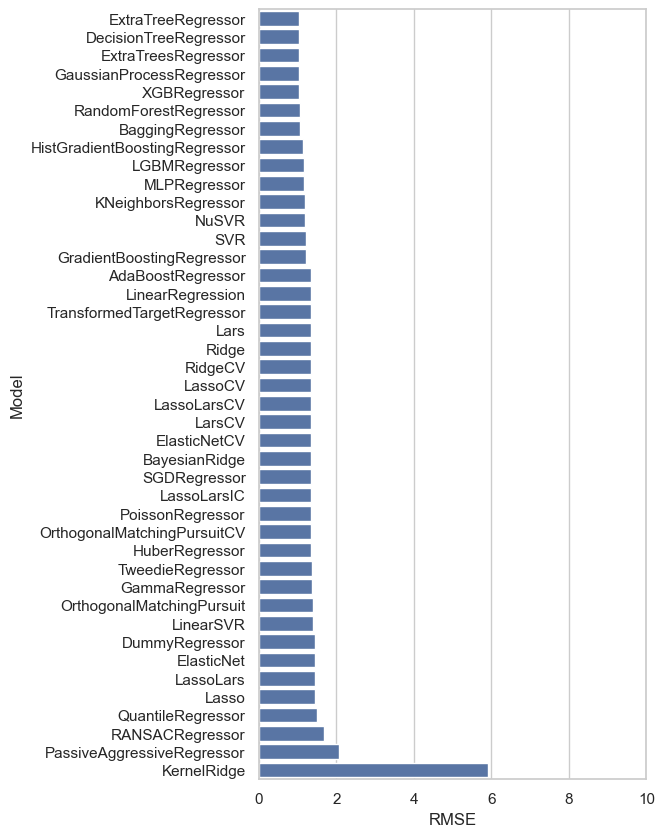

In [12]:
# Bar plot of RMSE values
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="RMSE", data=predictions_train)
ax.set(xlim=(0, 10))

[(0.0, 10.0)]

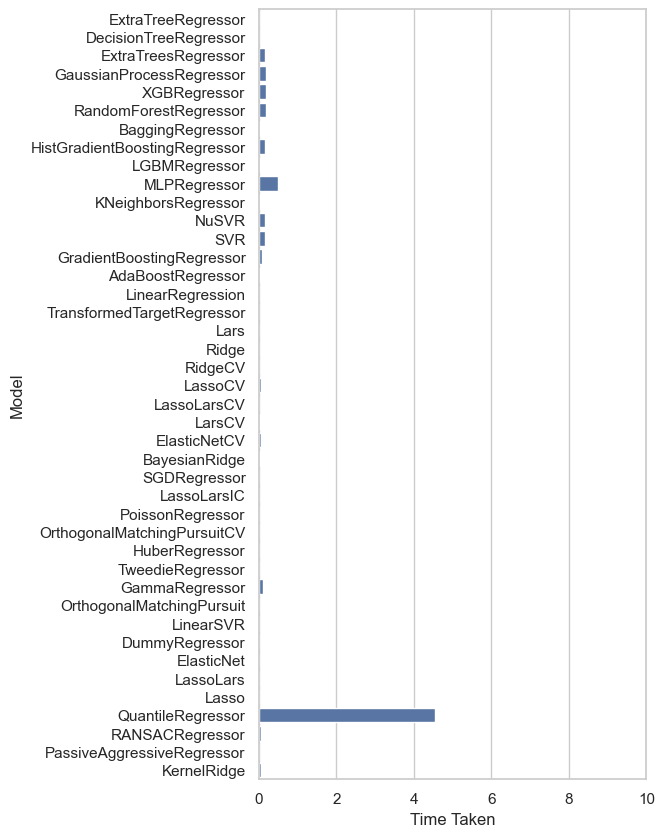

In [13]:
# Bar plot of calculation time
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="Time Taken", data=predictions_train)
ax.set(xlim=(0, 10))